# Regression Lab

Now have all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate model loss. 

## SWBAT

* Run a complete regression analysis through code only. 

## Here are all the formulas to put everything in perspective

#### Slope
<img src="m.png" width = 300>

#### Intercept 
<img src="b.png" width = 200>

#### R-squared
<img src="r2.png" width = 400>

#### Prediction
![](pred.jpg)


Use the functions created earlier to implement these formulas to run a regression analysis using X and Y as input variables. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [2]:
def calc_slope(xs,ys):
    numer = np.mean(xs)*np.mean(ys) - np.mean(xs*ys)
    denom = np.mean(xs)**2 - np.mean(xs**2)
    
    return numer/denom

In [18]:
def best_fit(xs,ys):
    m = calc_slope (xs,ys)
    b = np.mean(ys) - m * np.mean(xs)
    
    return round(m,2),round(b,2)

In [4]:
def reg_line (m, b, xs):
    x = xs
    y = [m*x + b for x in xs]
    
    return x,y

In [5]:
def sq_err(ys_a, ys_b):

    sum_errors = 0
    
    if len(ys_a) == len(ys_b):
        for y in range(len(ys_a)): 
            sum_errors += (ys_a[y] - ys_b[y])**2
    
        return sum_errors
    else:
        return 'The ranges of both lines do not equal!'

In [13]:
def r_squared(ys_real, ys_predicted):
    Y_mean = np.mean(np.array(ys_real))
    ys_mean = np.full(len(ys_real),Y_mean)
    
    SSE = sq_err (ys_real, ys_predicted)
    SST = sq_err (ys_real, ys_mean)
    
    r2 = 1 - (SSE/SST)
    
    return round(r2,2)

In [19]:
slope, intercept = best_fit(X,Y)
regression_line = reg_line (slope,intercept,X)
r2 = r_squared (Y,regression_line[1])
slope,intercept,r2

(0.56, 6.33, 0.97)

Basic Regression Diagnostics
----------------------------
Slope:  0.56
Y-Intercept:  6.33
R-Squared:  0.97
----------------------------
Model: Y = 0.56 * X + 6.33


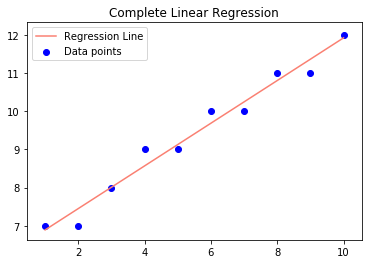

In [23]:
print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope: ',slope)
print('Y-Intercept: ',intercept)
print('R-Squared: ',r2)
print('----------------------------')
print('Model: Y = {} * X + {}'.format(slope,intercept))

plt.plot(regression_line[0],regression_line[1],color= 'salmon',label = "Regression Line")
plt.scatter(X,Y,color= 'blue',label = "Data points")
plt.legend()
plt.title ('Complete Linear Regression')
plt.show()

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


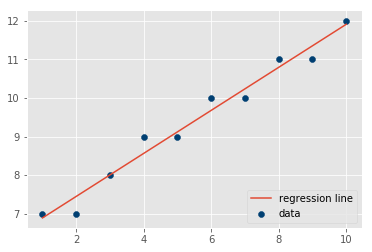

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of x = 4.5.

In [24]:
# Make prediction using given value and visualize on the scatter plot
x_new = 4.5
y_predict = slope * x_new + intercept

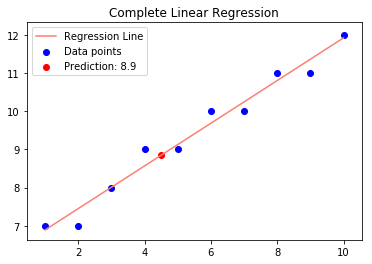

In [26]:
plt.plot(regression_line[0],regression_line[1],color= 'salmon',label = "Regression Line")
plt.scatter(X,Y,color= 'blue',label = "Data points")
plt.scatter(x_new,y_predict,color= 'red',label = "Prediction: {}".format(round(y_predict,1)))
plt.legend()
plt.title ('Complete Linear Regression')
plt.show()

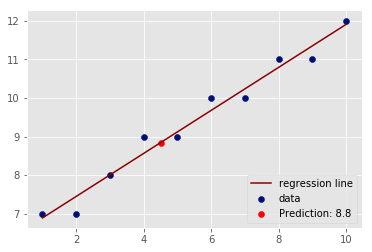

## Level up - Optional 
Load the "heightWeight.csv" dataset. Use the height as an independant and weight as a dependant variable and draw a regression line to data using your code above. Calculate your R-square for the model and try to predict new values of Y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next We shall see how we can use python's built in modules to perform such analyses with a much higher level of sophistication. 

In [27]:
hw_df = pd.read_csv('heightWeight.csv')
hw_df.head()

,height,Weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [38]:
slope2, intercept2 = best_fit(hw_df.height,hw_df.Weight)
reg_line2 = reg_line (slope2,intercept2,hw_df.height)
r2_2 = r_squared (hw_df.Weight,reg_line2[1])
slope2,intercept2,r2_2

(5.54, -204.48, 0.96)

Basic Regression Diagnostics
----------------------------
Slope:  5.54
Y-Intercept:  -204.48
R-Squared:  0.96
----------------------------
Model: Y = 5.54 * X + -204.48


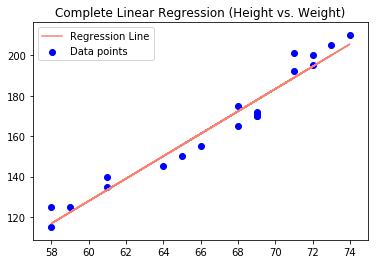

In [41]:
print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope: ',slope2)
print('Y-Intercept: ',intercept2)
print('R-Squared: ',r2_2)
print('----------------------------')
print('Model: Y = {} * X + {}'.format(slope2,intercept2))

plt.plot(reg_line2[0],reg_line2[1],color= 'salmon',label = "Regression Line")
plt.scatter(hw_df.height,hw_df.Weight,color= 'blue',label = "Data points")
plt.legend()
plt.title ('Complete Linear Regression (Height vs. Weight)')
plt.show()